# Overall team performance analysis

In this notebook, we are going to analyze how each team - over the 10 seasons - has performed with other premier league teams.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

# Set the style to 'ggplot'
plt.style.use('ggplot')

sys.path.append('../helper_funcs')
import helpers as hp
import general_stats_funcs as gsf

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
all_data = pd.read_csv('all_data.csv')
all_data.drop(labels='Unnamed: 0', axis=1, inplace=True)
all_data.head()

,Date,HomeTeam,AwayTeam,Final_HomeGoals,Final_AwayGoals,Final_Result,Half_HomeGoals,Half_AwayGoals,Half_Result,Referee,...,Home_Fouls,Away_Fouls,Home_Corner,Away_Corner,Home_Yellows,Away_Yellows,Home_Reds,Away_Reds,Season,Winners
0,11/08/07,Aston Villa,Liverpool,1.0,2.0,A,0.0,1.0,A,M Riley,...,18.0,11.0,4.0,2.0,4.0,2.0,0.0,0.0,0,Liverpool
1,11/08/07,Bolton,Newcastle,1.0,3.0,A,0.0,3.0,A,C Foy,...,15.0,16.0,4.0,3.0,1.0,1.0,0.0,0.0,0,Newcastle
2,11/08/07,Derby,Portsmouth,2.0,2.0,D,1.0,1.0,D,M Dean,...,14.0,17.0,6.0,6.0,1.0,2.0,0.0,0.0,0,Draw
3,11/08/07,Everton,Wigan,2.0,1.0,H,1.0,0.0,H,M Clattenburg,...,8.0,13.0,6.0,2.0,0.0,0.0,0.0,0.0,0,Everton
4,11/08/07,Middlesbrough,Blackburn,1.0,2.0,A,1.0,0.0,H,A Marriner,...,16.0,16.0,13.0,3.0,3.0,4.0,0.0,0.0,0,Blackburn


In [3]:
%time all_ars = hp.extract_team_data(all_data, 'Arsenal')
%time all_lfc = hp.extract_team_data(all_data, 'Liverpool')

Wall time: 2.67 s
Wall time: 3 s


In [4]:
all_ars.head()

,rival,ft_result,ft_goals,ft_goal_diff,ht_result,ht_goals,ht_goal_diff,mr_ref,shots,shots_target,fouls,corners,yellows,reds,season,venue,shots_diff,shots_targ_diff
0,Fulham,Won,2.0,1.0,Losing,0.0,-1.0,P Dowd,19.0,13.0,6.0,14.0,1.0,0.0,0,Home,7.0,4.0
1,Blackburn,Drew,1.0,0.0,Winning,1.0,1.0,A Wiley,10.0,3.0,15.0,4.0,4.0,0.0,0,Away,1.0,-1.0
2,Man City,Won,1.0,1.0,Draw,0.0,0.0,C Foy,16.0,10.0,8.0,8.0,0.0,0.0,0,Home,8.0,6.0
3,Portsmouth,Won,3.0,2.0,Winning,2.0,2.0,M Halsey,10.0,8.0,6.0,8.0,1.0,1.0,0,Home,-5.0,-2.0
4,Tottenham,Won,3.0,2.0,Losing,0.0,-1.0,M Clattenburg,16.0,10.0,22.0,4.0,2.0,0.0,0,Away,2.0,5.0


### Compare winning rates per team

In [5]:
ars_result = pd.DataFrame(all_ars['ft_result'].value_counts()).transpose()
lfc_result = pd.DataFrame(all_lfc['ft_result'].value_counts()).transpose()

ars_result['team'] = 'Arsenal'
lfc_result['team'] = 'Liverpool'

ars_result.set_index('team', inplace=True)
lfc_result.set_index('team', inplace=True)

overall_result = pd.concat([ars_result, lfc_result], axis=0)

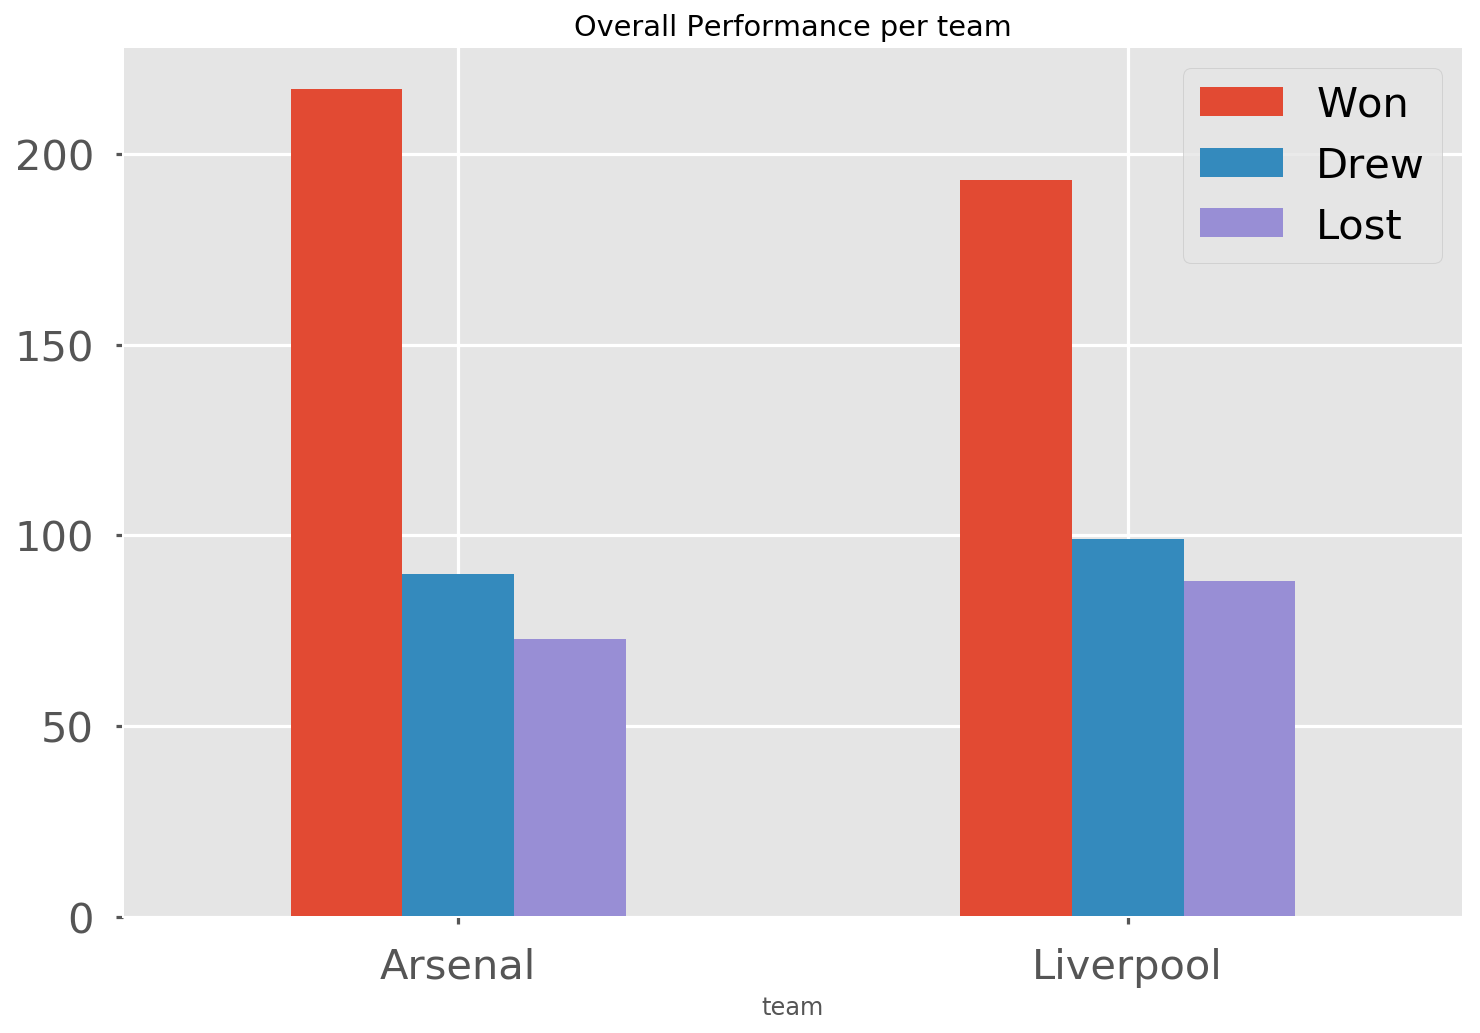

In [6]:
_ = overall_result.plot(kind='bar',
                        rot=0, figsize=(12,8),
                        title='Overall Performance per team')

I think this is intuitively self-explanatory. Arsenal has won more games than Liverpool, drew, less and lost less. If that's not a clear indication of who is better overall, then I don't know what is. The **Simpson's Paradox**?? Not in this case I'm afraid.

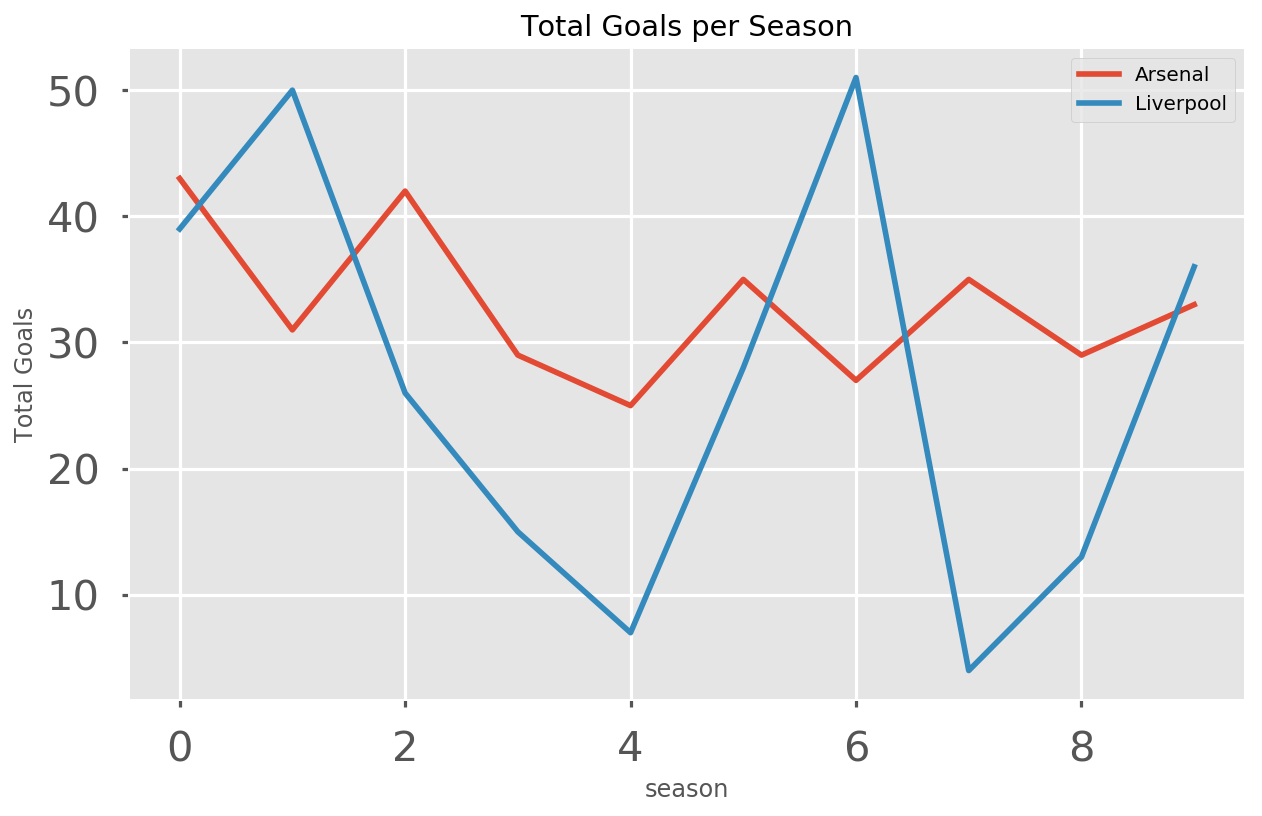

In [7]:
(hp.view_seasonStats(all_ars, 'Arsenal',
                    all_lfc, 'Liverpool',
                    'ft_goal_diff', 'Goals'))

### What was wrong with Liverpool??
Between seasons 2 to 5 (inclusive) Liverpool was a complete mess. I wonder where they were finishing on the table...<br>
If I had access to player data from Opta, I would be interested in investigating how player performances made such an ugly graph, what changed between season 5 and 7 and what happened in season 8.

### Anyway, how were they doing on the shots?

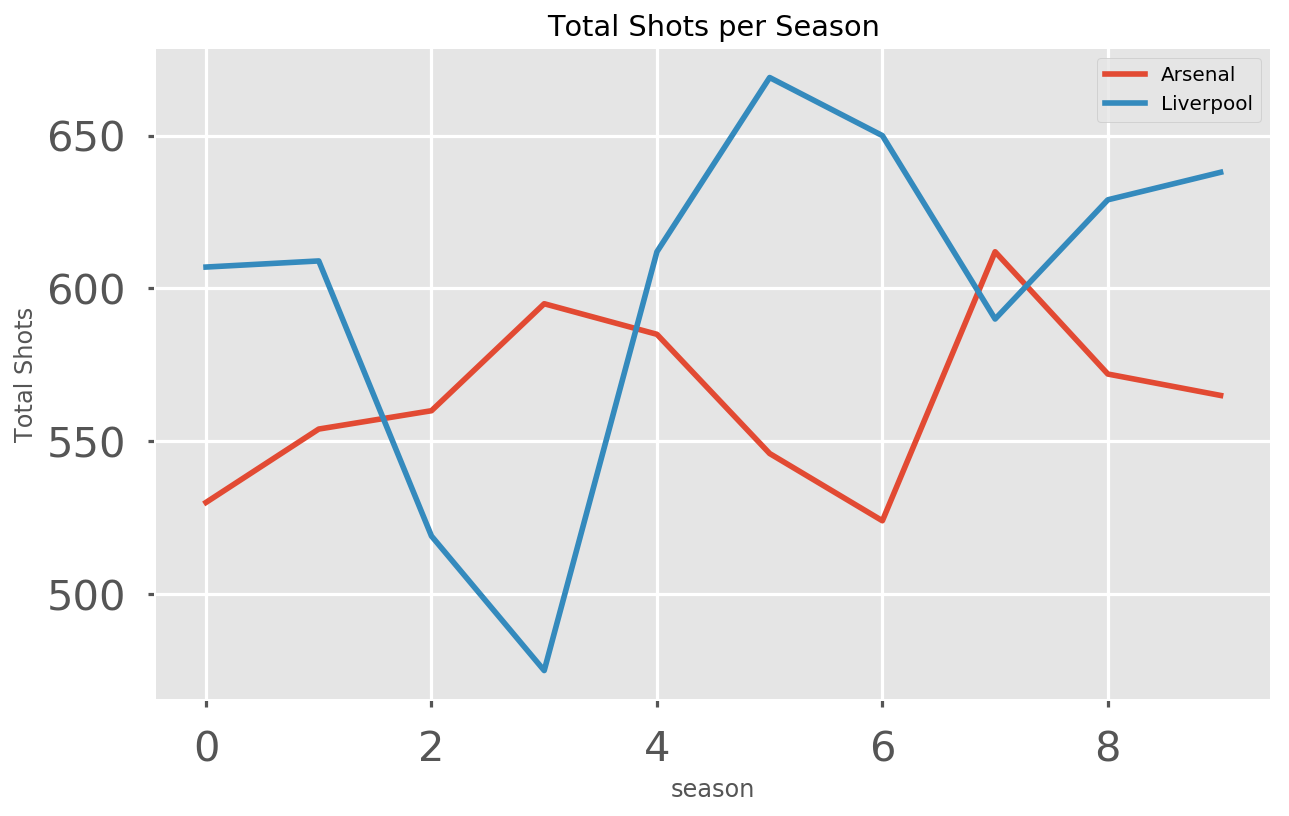

In [8]:
(hp.view_seasonStats(all_ars, 'Arsenal',
                    all_lfc, 'Liverpool',
                    'shots', 'Shots'))

In [9]:
all_ars.head()

,rival,ft_result,ft_goals,ft_goal_diff,ht_result,ht_goals,ht_goal_diff,mr_ref,shots,shots_target,fouls,corners,yellows,reds,season,venue,shots_diff,shots_targ_diff
0,Fulham,Won,2.0,1.0,Losing,0.0,-1.0,P Dowd,19.0,13.0,6.0,14.0,1.0,0.0,0,Home,7.0,4.0
1,Blackburn,Drew,1.0,0.0,Winning,1.0,1.0,A Wiley,10.0,3.0,15.0,4.0,4.0,0.0,0,Away,1.0,-1.0
2,Man City,Won,1.0,1.0,Draw,0.0,0.0,C Foy,16.0,10.0,8.0,8.0,0.0,0.0,0,Home,8.0,6.0
3,Portsmouth,Won,3.0,2.0,Winning,2.0,2.0,M Halsey,10.0,8.0,6.0,8.0,1.0,1.0,0,Home,-5.0,-2.0
4,Tottenham,Won,3.0,2.0,Losing,0.0,-1.0,M Clattenburg,16.0,10.0,22.0,4.0,2.0,0.0,0,Away,2.0,5.0


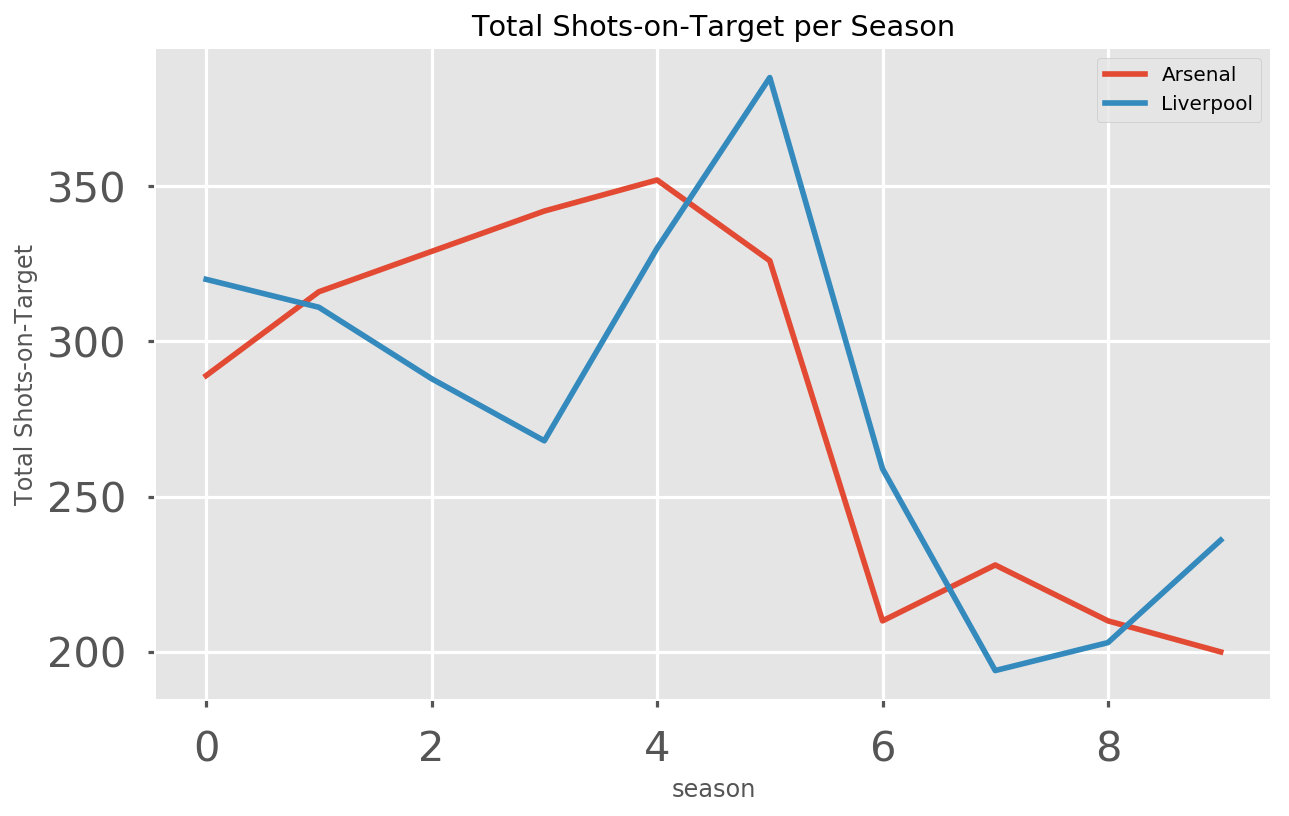

In [10]:
(hp.view_seasonStats(all_ars, 'Arsenal',
                    all_lfc, 'Liverpool',
                    'shots_target', 'Shots-on-Target'))

### Is there something interesting happening in the EPL?

In [11]:
all_data.loc[:, 'Referee': 'Home_Fouls'].head()

,Referee,Home_Shots,Away_Shots,HomeShots_Target,AwayShots_Target,Home_Fouls
0,M Riley,10.0,17.0,6.0,7.0,18.0
1,C Foy,13.0,7.0,9.0,5.0,15.0
2,M Dean,12.0,12.0,5.0,6.0,14.0
3,M Clattenburg,12.0,14.0,8.0,4.0,8.0
4,A Marriner,10.0,4.0,6.0,4.0,16.0


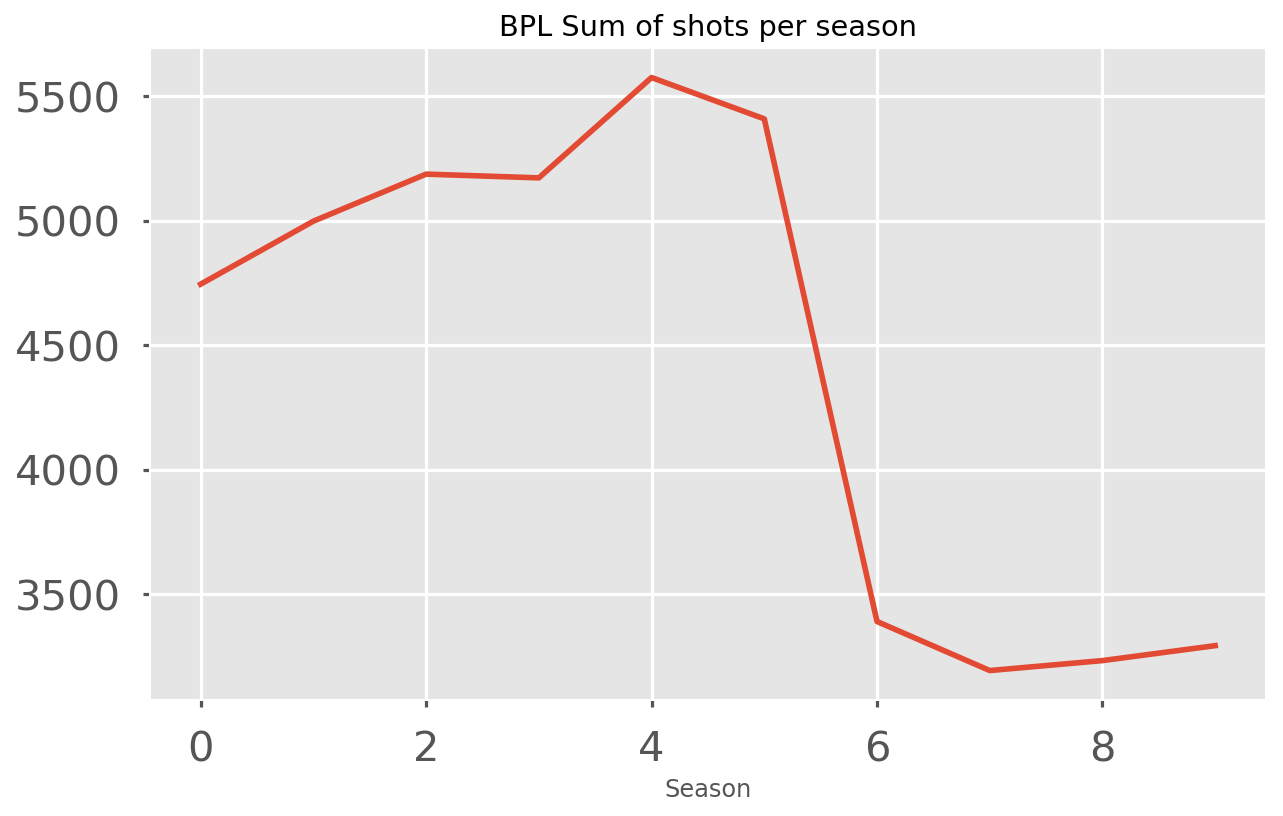

In [12]:
all_targets = all_data.groupby('Season').agg({'HomeShots_Target': 'sum', 'AwayShots_Target': 'sum'})
all_targets['Total_Shots'] = all_targets['HomeShots_Target'] + all_targets['AwayShots_Target']
# LOL! This is what happens when you have no StackOverflow by your side. Naive approaches

_ = all_targets.plot(y='Total_Shots', figsize=(10,6), legend=None)

_ = plt.title('BPL Sum of shots per season')
_ = plt.savefig('BPL_SumOfShots.jpeg')

### Is there witchcraft on different stadia?

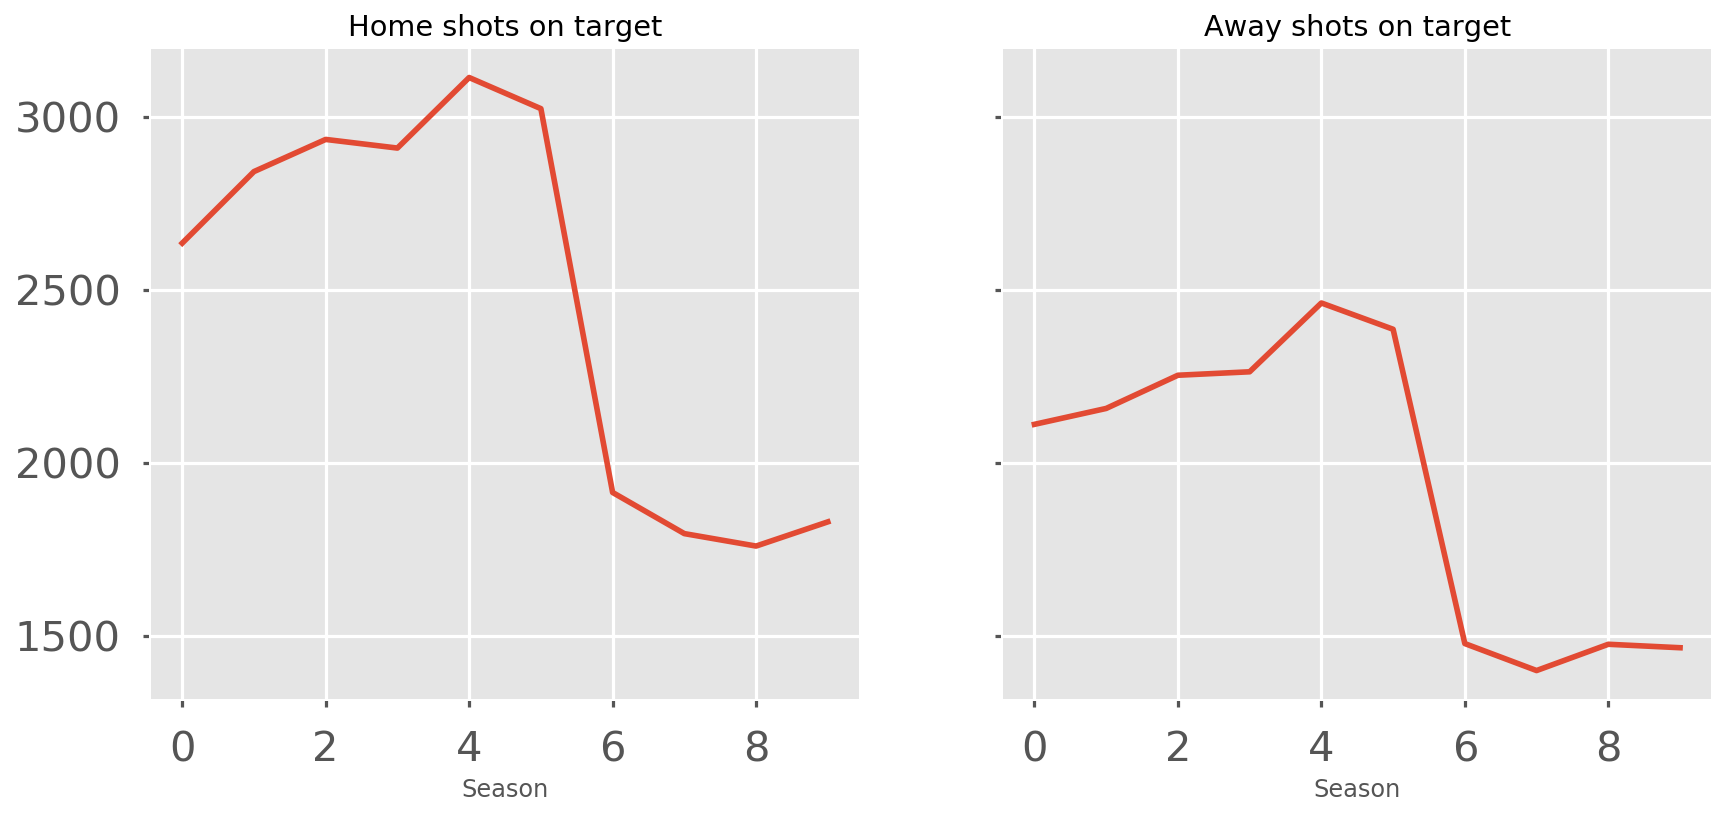

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sub_figSize = (14, 6)

_ = all_targets.plot(y='HomeShots_Target', ax=ax1, figsize=sub_figSize, rot=0, legend=None)
_ = all_targets.plot(y='AwayShots_Target', ax=ax2, figsize=sub_figSize, rot=0, legend=None)

_ = ax1.set_title('Home shots on target')
_ = ax2.set_title('Away shots on target')

_ = plt.savefig('BPL Home&Away shots.jpeg')